In [1]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

# !pip install -q git+https://github.com/tensorflow/docs
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

print(tf.__version__)

2.3.0


In [3]:
dataset=pd.read_csv(r'C:\Users\KOTHA SAI\Downloads\cars.csv')
dataset = dataset.drop("v.id", 1)
dataset = dataset.iloc[:, :-1]
dataset.head()

,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,buying price,profit
0,781997,881997,10,72310,2,2,16,186,58,194,461803,6
1,553464,643464,9,72189,5,6,6,173,81,189,273747,14
2,1175130,1275130,10,74100,5,4,14,184,104,95,852711,11
3,884824,924824,4,34340,1,7,20,183,125,122,701224,11
4,412866,462866,5,48050,1,1,10,189,89,114,213995,3


In [5]:
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values

mean_Y = np.mean(Y)
std_Y = np.std(Y)

sc = StandardScaler()
X = sc.fit_transform(X)
Y = (Y - np.mean(Y))/np.std(Y)

train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size = 0.3, random_state=10)

In [6]:
def build_model(X):
    model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=X.shape),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model

In [7]:
model = build_model(train_X)

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1400, 64)          704       
_________________________________________________________________
dense_1 (Dense)              (None, 1400, 64)          4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1400, 1)           65        
Total params: 4,929
Trainable params: 4,929
Non-trainable params: 0
_________________________________________________________________


In [9]:
EPOCHS = 500

history = model.fit(
  train_X, train_Y,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:0.1187,  mae:0.2360,  mse:0.1187,  val_loss:0.0171,  val_mae:0.1037,  val_mse:0.0171,  
....................................................................................................
Epoch: 100, loss:0.0010,  mae:0.0235,  mse:0.0010,  val_loss:0.0018,  val_mae:0.0347,  val_mse:0.0018,  
....................................................................................................
Epoch: 200, loss:0.0005,  mae:0.0175,  mse:0.0005,  val_loss:0.0013,  val_mae:0.0281,  val_mse:0.0013,  
....................................................................................................
Epoch: 300, loss:0.0004,  mae:0.0147,  mse:0.0004,  val_loss:0.0015,  val_mae:0.0285,  val_mse:0.0015,  
....................................................................................................
Epoch: 400, loss:0.0004,  mae:0.0147,  mse:0.0004,  val_loss:0.0008,  val_mae:0.0210,  val_mse:0.0008,  
........................................................................

In [10]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
495,0.000252,0.011219,0.000252,0.000812,0.021167,0.000812,495
496,0.000301,0.013269,0.000301,0.000654,0.017582,0.000654,496
497,0.000317,0.013135,0.000317,0.000690,0.021086,0.000690,497
498,0.000213,0.010862,0.000213,0.000648,0.017328,0.000648,498
499,0.000284,0.012177,0.000284,0.002215,0.037562,0.002215,499


In [11]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'MAE [BUYING PRICE]')

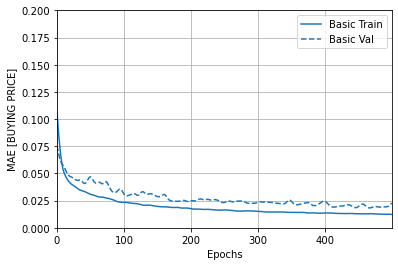

In [12]:
plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0, 0.2])
plt.ylabel('MAE [BUYING PRICE]')

Text(0, 0.5, 'MSE [BUYING PRICE^2]')

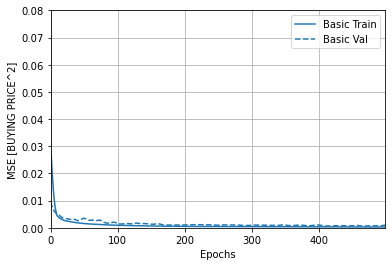

In [13]:
plotter.plot({'Basic': history}, metric = "mse")
plt.ylim([0, 0.08])
plt.ylabel('MSE [BUYING PRICE^2]')

In [14]:
model = build_model(train_X)

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

early_history = model.fit(train_X, train_Y, 
                    epochs=1000, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:0.2577,  mae:0.3585,  mse:0.2577,  val_loss:0.0282,  val_mae:0.1366,  val_mse:0.0282,  
............................................

Text(0, 0.5, 'MAE [BUYING PRICE]')

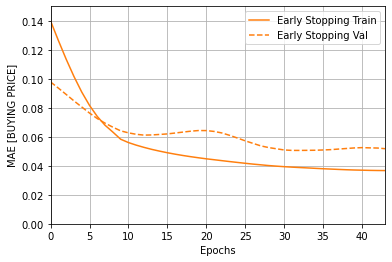

In [15]:
plotter.plot({'Early Stopping': early_history}, metric = "mae")
plt.ylim([0, 0.150])
plt.ylabel('MAE [BUYING PRICE]')

In [16]:
loss, mae, mse = model.evaluate(test_X, test_Y, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} BUYING PRICE".format(mae))

19/19 - 0s - loss: 0.0030 - mae: 0.0435 - mse: 0.0030
Testing set Mean Abs Error:  0.04 BUYING PRICE


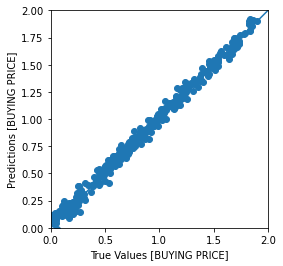

In [17]:
test_predictions = model.predict(test_X).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_Y, test_predictions)
plt.xlabel('True Values [BUYING PRICE]')
plt.ylabel('Predictions [BUYING PRICE]')
lims = [0, 2]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [18]:
test_dataset = pd.read_csv(r"C:\Users\KOTHA SAI\Downloads\test.csv")
test_dataset = test_dataset.drop('v.id', 1)
test_dataset.head()

,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque
0,884463,934463,5,37235,1,10,6,152,115,156
1,358375,448375,9,71532,5,3,8,171,70,95
2,925561,955561,3,21276,2,10,11,188,67,118
3,1190067,1210067,2,17766,3,2,14,174,97,155
4,419517,479517,6,49626,5,2,14,192,91,184


In [19]:
test = test_dataset.iloc[:, :].values
test = sc.transform(test)

In [22]:
test_preds = model.predict(test).flatten()
test_preds = (test_preds*std_Y)+mean_Y
test_preds

array([ 704547.   ,   94930.59 ,  763689.25 , 1025581.75 ,  226116.1  ,
        269066.38 ,  680856.8  ,  844500.5  ,  582160.6  ,  425319.84 ,
        149292.53 ,  867734.   ,  792617.6  ,  770651.2  ,  873979.6  ,
        905554.2  ,  679227.1  ,  152443.4  ,  688727.6  ,  123582.78 ,
        323220.75 ,  604359.9  ,  391770.44 ,  812720.94 ,  156964.31 ,
        286907.28 ,  767607.5  ,  843879.1  ,  133411.97 ,  110790.   ,
        323944.94 ,  440471.38 ,  166645.   ,  526190.75 ,  854559.75 ,
        623815.9  ,  295461.7  ,  316921.44 ,  477845.25 ,  338029.3  ,
        718920.   ,  446149.22 ,  537839.1  ,  291807.2  ,  694365.6  ,
        841537.4  ,  861098.8  ,  369752.1  ,  469849.06 ,  413362.25 ,
        246109.47 ,  948652.9  ,  182841.94 ,  242421.25 ,  135847.9  ,
        334591.38 ,  145418.56 ,  397490.9  ,  618838.3  ,   95412.44 ,
        426229.12 ,  620971.4  ,  431034.97 ,  882793.25 ,  498279.72 ,
        222174.19 ,  887145.56 ,  621046.75 ,  564346.44 ,  1440

In [31]:
test_dataset = pd.read_csv(r"C:\Users\KOTHA SAI\Downloads\test.csv")
ids = test_dataset.iloc[:,:1].values
ids = np.squeeze(ids)

In [32]:
test_preds_dataframe = pd.DataFrame({"v.id": ids, "Test Preds": test_preds})
test_preds_dataframe.to_csv("test_preds.csv")